In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
data = pd.read_csv('munnar.csv')

data

,Hotel Name\t\t\t\t\t\t\t\t\t,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2 km,"2,728",574
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2 km,"4,451",969
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,950 m,"2,758",684
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8 km,"2,675",756
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9 km,"3,203",654
...,...,...,...,...,...,...,...,...,...,...
69,The Fog Munnar (Resort & Spa),4.5,Excellent,292,5.0,Ettycity Road,city centre,13.2 km,"8,103","2,178"
70,Skylark Holidays | Rooms & Caretaker,4.1,Very Good,17,NaN,Chinnakanal,city centre,20.6 km,"3,317",684
71,Deshadan Mountain Resort- The highest resort i...,4.3,Excellent,395,4.0,Pallivasal,city centre,5.8 km,"3,953",808
72,Nature Zone Jungle Resort,4.1,Very Good,187,4.0,Pallivasal,city centre,6.6 km,"6,862","2,124"


**About Dataset**

Tourism and hospitality industry is evolving in Kerala in the recent years, especially in Munnar. Here I have scraped hotel data from MakeMyTrip of those situated in Munnar. Munnar is an amazing hill station, which makes a large contribution to tea exports from the country.

**Columns in dataset:**

- Hotel Name
- Rating
- Rating Description
- Reviews
- Star rating
- Location
- Nearest Landmark
- Distance to the Landmark
- Price
- Tax
- Please Note:

Price given here is for one night (base room).
Tax given here is slapped on top of the price payable. Therefore, total amount = Price + Tax

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name									   74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           57 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     object 
 8   Price                 74 non-null     object 
 9   Tax                   72 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 5.9+ KB


In [260]:
data[data['Star Rating'].isna()]

,Hotel Name\t\t\t\t\t\t\t\t\t,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
12,Chithirapuram Palace | Rooms & Restaurant\nLik...,4.5,Excellent,96,NaN,Chithirapuram,city centre,10.8 km,"2,494",634
14,Sn Holiday Home,4.2,Very Good,369,NaN,Anachal,city centre,11.1 km,966,229
16,Landy Queen Homestay | Rooms & Caretaker,4.5,Excellent,188,NaN,Central Munnar,Attukal Waterfalls,1.1 km,"1,279",269
21,Tulsi Village Retreat | Treehouse & Cabin Stay...,3.9,Very Good,352,NaN,Adimali,city centre,21.6 km,"1,545",346
25,Jungle Jive Tree House | Rooms in a Homestay\n...,3.8,Very Good,10,NaN,Munnar,city centre,15.0 km,"5,204","1,134"
30,Munnar Ice Queen | Rooms & Cottages\nLike a 3,4.7,Excellent,112,NaN,Muthuvaankudi,city centre,13.4 km,"2,410",596
31,Queen Of Munnar | Rooms in a Homestay,2.8,Average,252,NaN,Central Munnar,Attukal Waterfalls,2.2 km,978,156
33,Mercys Munnar Homestay | Room & Caretaker,3.9,Very Good,48,NaN,Munnar,city centre,17.8 km,930,290
35,The Hosteller Munnar,4.2,Very Good,142,NaN,Periyakanal-Muttukad Road,city centre,22.8 km,"3,629",792
47,Grace Munnar,3.9,Very Good,43,NaN,Munnar,city centre,14.1 km,"1,814",429


In [261]:
data.describe()

,Rating,Reviews,Star Rating
count,74.000000,74.000000,57.000000
mean,4.068919,375.810811,3.912281
std,0.401001,383.407208,0.808011
min,2.800000,6.000000,2.000000
25%,3.900000,112.250000,3.000000
50%,4.100000,240.500000,4.000000
75%,4.300000,437.000000,5.000000
max,4.800000,1934.000000,5.000000


**CLEANING THE DATA**

In [262]:
data.rename(columns={'Hotel Name\t\t\t\t\t\t\t\t\t': 'Hotel Name'}, inplace=True)
data['Price'] = data['Price'].str.replace(',','').astype(float)


In [263]:
data[data['Tax'].isna()]

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
26,Abad Copper Castle Hill Valley Resort,4.2,Very Good,366,4.0,Near Pothamedu Viewpoint,city centre,3.3 km,4910.0,NaN
27,Chandys Windy Woods,4.8,Excellent,355,5.0,Chithirapuram,city centre,8.8 km,9000.0,NaN


In [264]:
data['Tax'] = data['Tax'].str.replace(',','').astype(float)

In [265]:
data['Tax'] = data['Tax'].fillna(0)
data[data['Tax'].isna()]

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax


In [266]:
data['total_amount'] = data['Price'] + data['Tax']

In [267]:
data['Distance to Landmark'] = data['Distance to Landmark'].str[:-3]

In [268]:
data['Distance to Landmark'] = data['Distance to Landmark'].astype(float)

In [269]:
# Display the top 10 hotels with the highest ratings
df_sorted_by_rating = data.sort_values(by="Rating", ascending=False)
top_rated_hotels = df_sorted_by_rating.head(10)
print("Top 10 Hotels with the Highest Ratings:")
top_rated_hotels[["Hotel Name", "Rating",'Rating Description', 'Location','total_amount','Distance to Landmark']]

Top 10 Hotels with the Highest Ratings:


,Hotel Name,Rating,Rating Description,Location,total_amount,Distance to Landmark
27,Chandys Windy Woods,4.8,Excellent,Chithirapuram,9000.0,8.8
64,The Wild Trails Munnar,4.7,Excellent,Mankulam,9356.0,19.5
30,Munnar Ice Queen | Rooms & Cottages\nLike a 3,4.7,Excellent,Muthuvaankudi,3006.0,13.4
18,The Panoramic Getaway,4.6,Excellent,Chithirapuram,16591.0,9.8
36,ELEPHANT PASSAGE,4.6,Excellent,Anachal,13806.0,11.9
15,Vibe Munnar,4.6,Excellent,Ettycity Road,10285.0,13.1
54,SpiceTree Munnar Boutique Resort,4.6,Excellent,Periyakanal-Muttukad Road,13669.0,22.6
38,Fragrant Nature Munnar,4.5,Excellent,Pallivasal,12272.0,4.3
16,Landy Queen Homestay | Rooms & Caretaker,4.5,Excellent,Central Munnar,1548.0,1.1
69,The Fog Munnar (Resort & Spa),4.5,Excellent,Ettycity Road,10281.0,13.2


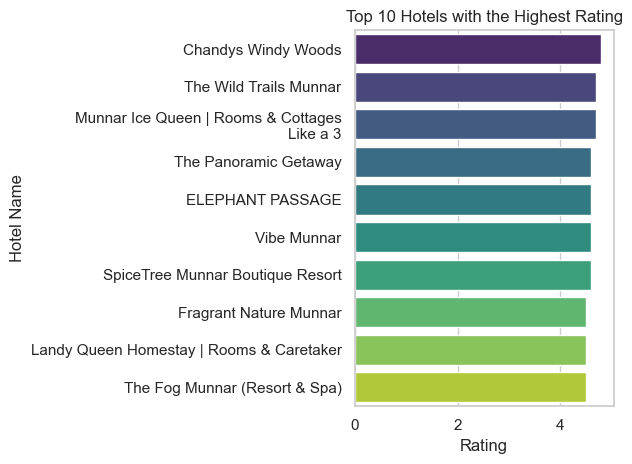

In [270]:

# Sort the DataFrame by Rating in descending order
df_sorted_by_price = data.sort_values(by="Rating", ascending=False)

# Display the top 10 hotels with the highest rating
top_priced_hotels = df_sorted_by_price.head(10)

# Create a bar chart to show Rating, Rating Description, and Location
# plt.figure(figsize=(12, 6))
sns.barplot(x="Rating", y="Hotel Name", data=top_priced_hotels, orient="h", palette="viridis")
plt.xlabel("Rating")
plt.ylabel("Hotel Name")
plt.title("Top 10 Hotels with the Highest Rating")

# Customize the plot
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()

In [271]:
# Sort the DataFrame by Price in descending order
df_sorted_by_price = data.sort_values(by="total_amount", ascending=False)

# Display the top 10 hotels with the highest prices
top_priced_hotels = df_sorted_by_price.head(10)
print("\nTop 10 Hotels with the Highest Prices:")
top_priced_hotels[["Hotel Name", "total_amount",'Rating','Rating Description','Location','Distance to Landmark']]


Top 10 Hotels with the Highest Prices:


,Hotel Name,total_amount,Rating,Rating Description,Location,Distance to Landmark
18,The Panoramic Getaway,16591.0,4.6,Excellent,Chithirapuram,9.8
36,ELEPHANT PASSAGE,13806.0,4.6,Excellent,Anachal,11.9
54,SpiceTree Munnar Boutique Resort,13669.0,4.6,Excellent,Periyakanal-Muttukad Road,22.6
11,Parakkat Nature Resorts,12659.0,4.3,Excellent,Pallivasal,7.8
38,Fragrant Nature Munnar,12272.0,4.5,Excellent,Pallivasal,4.3
45,Mountain Club Resort Munnar,11948.0,4.3,Excellent,Chinnakanal,21.3
15,Vibe Munnar,10285.0,4.6,Excellent,Ettycity Road,13.1
69,The Fog Munnar (Resort & Spa),10281.0,4.5,Excellent,Ettycity Road,13.2
22,Elixir Hills Suites Resort & Spa,9876.0,4.2,Very Good,Laxmi Estate,13.0
64,The Wild Trails Munnar,9356.0,4.7,Excellent,Mankulam,19.5


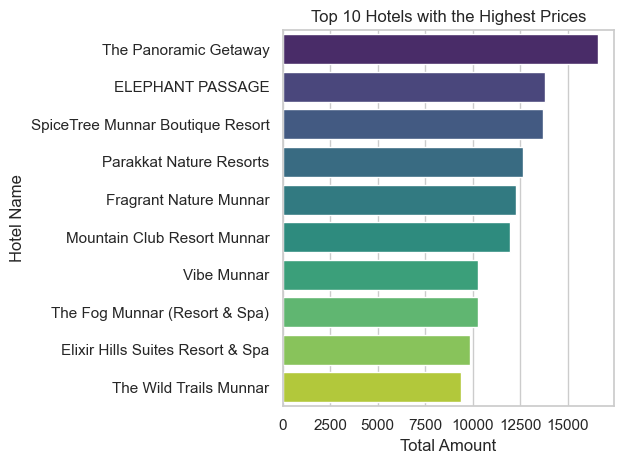

In [272]:

# Sort the DataFrame by Price in descending order
df_sorted_by_price = data.sort_values(by="total_amount", ascending=False)

# Display the top 10 hotels with the highest prices
top_priced_hotels = df_sorted_by_price.head(10)

# Create a bar chart to show Rating, Rating Description, and Location
sns.barplot(x="total_amount", y="Hotel Name", data=top_priced_hotels, orient="h", palette="viridis")
plt.xlabel("Total Amount")
plt.ylabel("Hotel Name")
plt.title("Top 10 Hotels with the Highest Prices")

# Customize the plot
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()

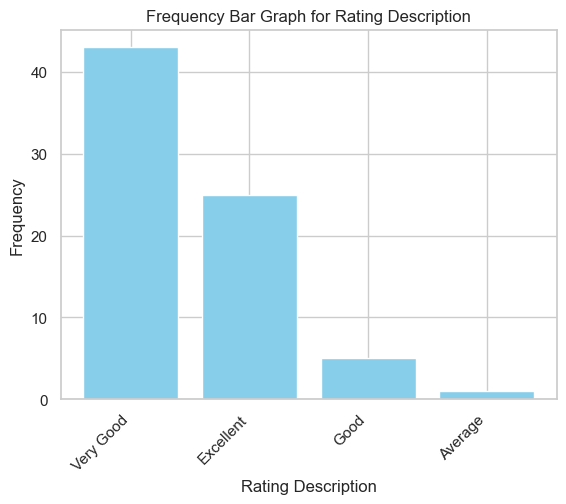

In [273]:
rating_counts = data['Rating Description'].value_counts().reset_index()

# Rename the columns for clarity
rating_counts.columns = ['Rating Description', 'Frequency']

# Sort the DataFrame by frequency
rating_counts = rating_counts.sort_values(by='Frequency', ascending=False)

# Create a bar plot
plt.bar(rating_counts['Rating Description'], rating_counts['Frequency'], color='skyblue')
plt.xlabel('Rating Description')
plt.ylabel('Frequency')
plt.title('Frequency Bar Graph for Rating Description')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

<AxesSubplot: >

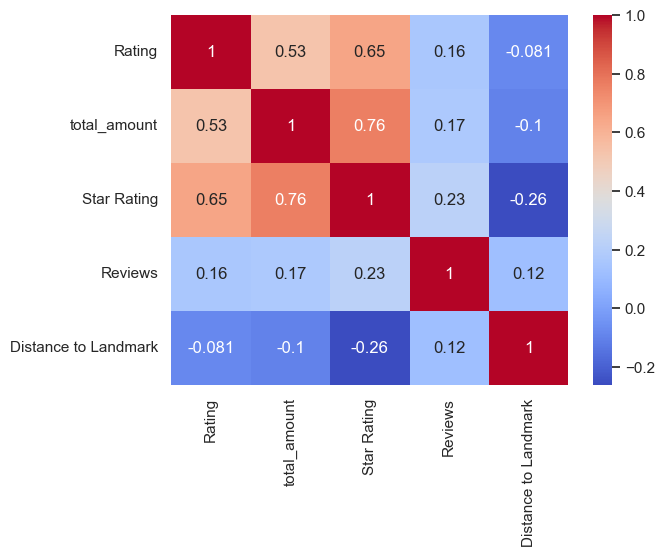

In [274]:
corr_matrix = data[['Rating', 'total_amount','Star Rating','Reviews','Distance to Landmark']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

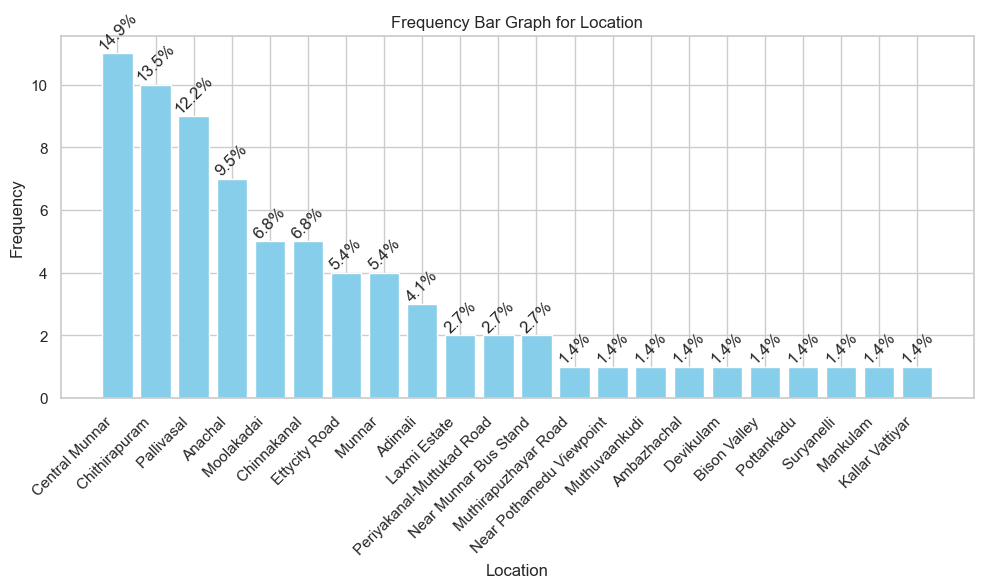

In [275]:
# Assuming you have a DataFrame named 'data' with a 'Location' column
location_counts = data['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Frequency']

# Sort the DataFrame by frequency
location_counts = location_counts.sort_values(by='Frequency', ascending=False)

# Calculate the total count
total_count = location_counts['Frequency'].sum()

# Calculate the percentage for each location
location_counts['Percentage'] = (location_counts['Frequency'] / total_count) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(location_counts['Location'], location_counts['Frequency'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Frequency Bar Graph for Location')
plt.xticks(rotation=45, ha='right')


for bar, percentage in zip(bars, location_counts['Percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom',rotation=45)

plt.tight_layout()
plt.show()


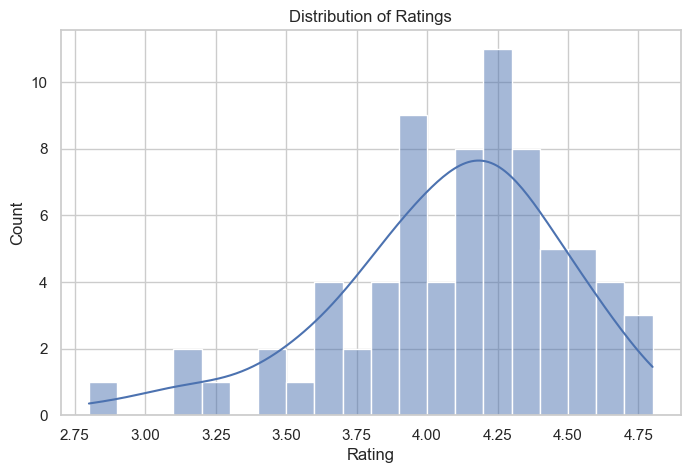

In [276]:
# Visualize the distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="Rating", bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

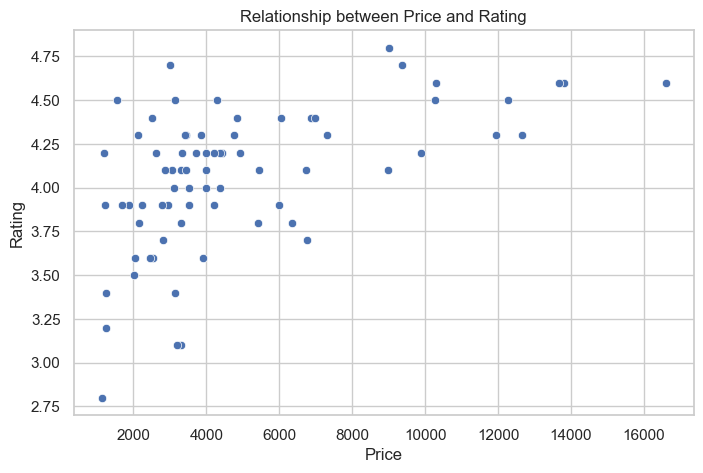

In [277]:
# Visualize the relationship between price and rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="total_amount", y="Rating")
plt.title("Relationship between Price and Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

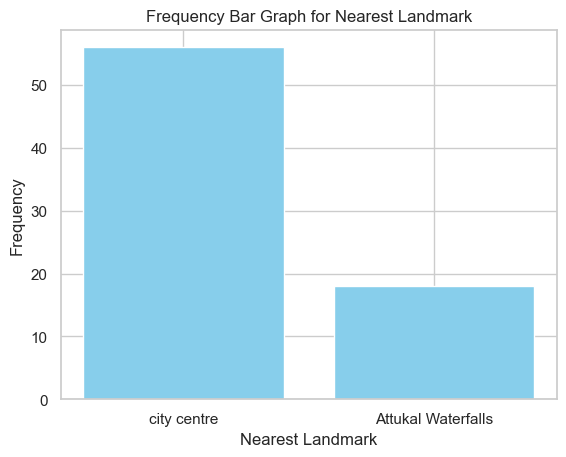

In [278]:
rating_counts = data['Nearest Landmark'].value_counts().reset_index()

# Rename the columns for clarity
rating_counts.columns = ['Nearest Landmark', 'Frequency']

# Sort the DataFrame by frequency
rating_counts = rating_counts.sort_values(by='Frequency', ascending=False)

# Create a bar plot
plt.bar(rating_counts['Nearest Landmark'], rating_counts['Frequency'], color='skyblue')
plt.xlabel('Nearest Landmark')
plt.ylabel('Frequency')
plt.title('Frequency Bar Graph for Nearest Landmark')
plt.show()

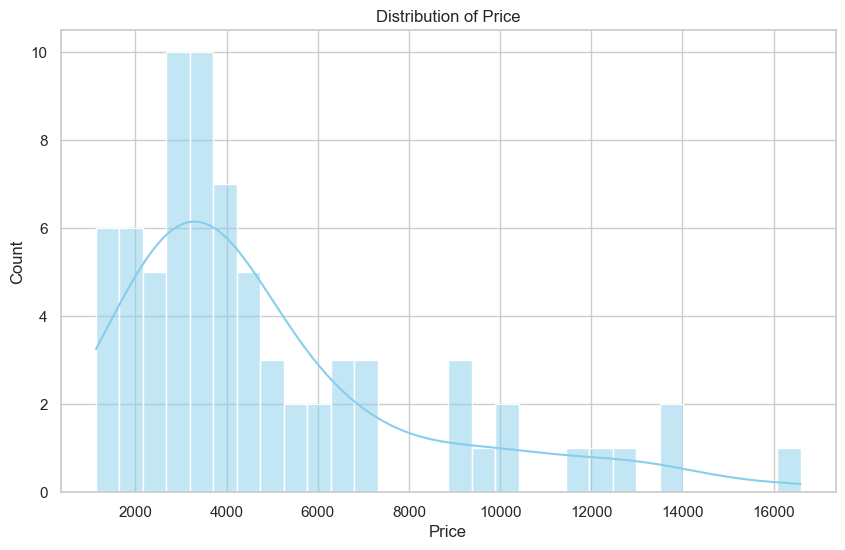

In [284]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='total_amount', bins=30, kde=True, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Price')
plt.show()

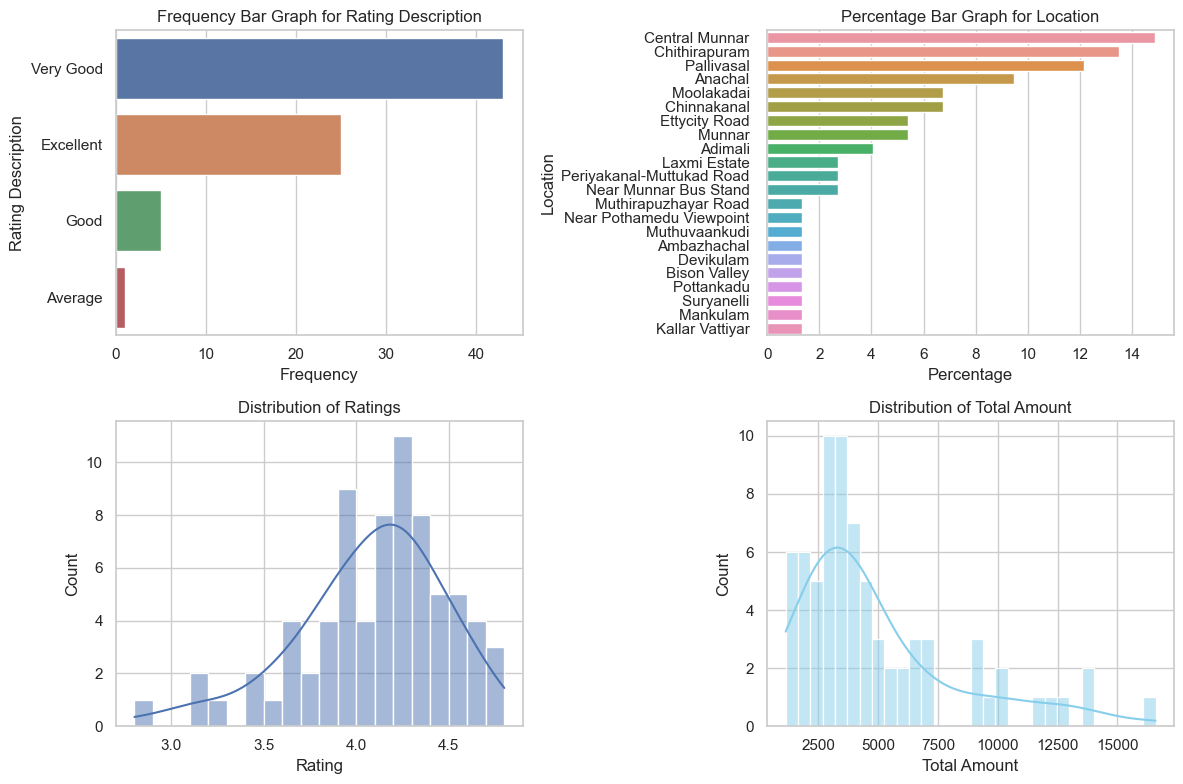

In [285]:
# Primeiro, vamos criar subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico 1 - Gráfico de barras da frequência de Rating Description
rating_counts = data['Rating Description'].value_counts().reset_index()
rating_counts.columns = ['Rating Description', 'Frequency']
rating_counts = rating_counts.sort_values(by='Frequency', ascending=False)
sns.barplot(x='Frequency', y='Rating Description', data=rating_counts, ax=axes[0, 0])
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].set_ylabel('Rating Description')
axes[0, 0].set_title('Frequency Bar Graph for Rating Description')

# Gráfico 2 - Gráfico de barras da frequência de Location
location_counts = data['Location'].value_counts(normalize=True).mul(100).reset_index()
location_counts.columns = ['Location', 'Percentage']
location_counts = location_counts.sort_values(by='Percentage', ascending=False)
sns.barplot(x='Percentage', y='Location', data=location_counts, ax=axes[0, 1])
axes[0, 1].set_xlabel('Percentage')
axes[0, 1].set_ylabel('Location')
axes[0, 1].set_title('Percentage Bar Graph for Location')

# Visualize the distribution of ratings
sns.histplot(data=data, x="Rating", bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Ratings")
axes[1, 0].set_xlabel("Rating")
axes[1, 0].set_ylabel("Count")

# Visualize the distribution of Price
sns.histplot(data=data, x='total_amount', bins=30, kde=True, color='skyblue', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Total Amount')
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_xlabel("Total Amount")

# Ajuste o layout
plt.tight_layout()
# Mostre a visualização
plt.show()


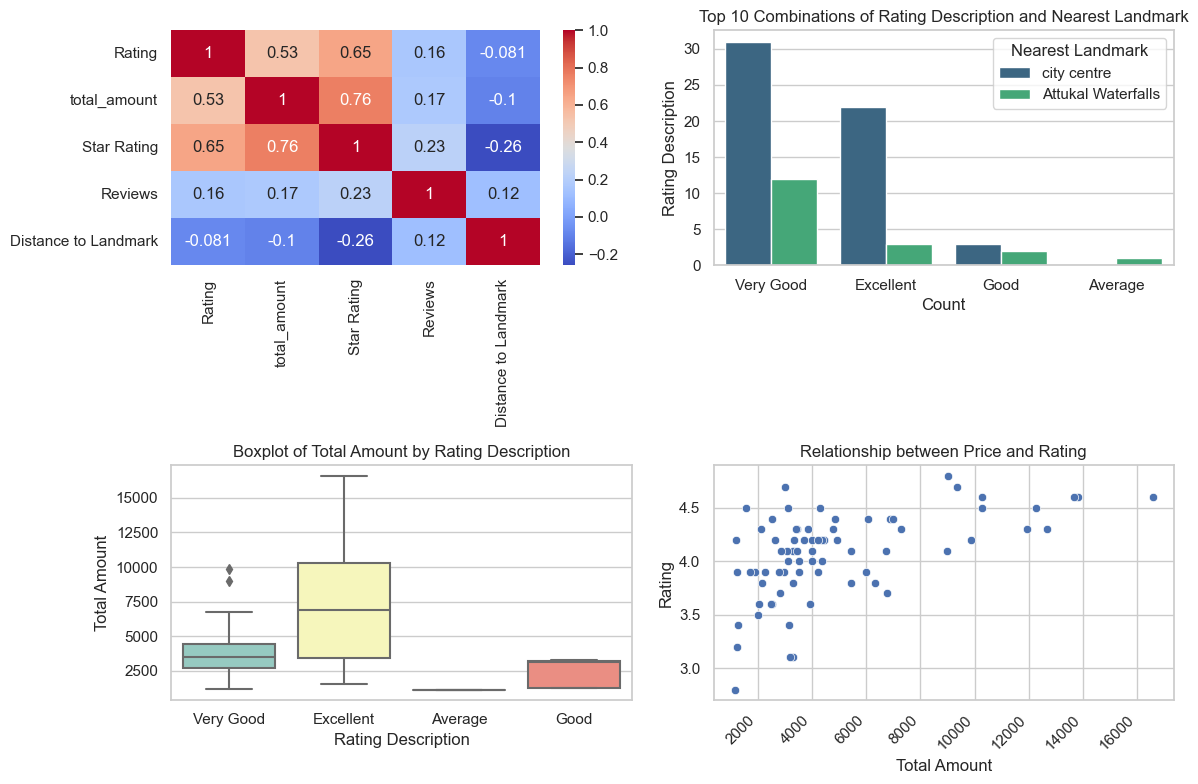

In [280]:
# Primeiro, vamos criar subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

corr_matrix = data[['Rating', 'total_amount','Star Rating','Reviews','Distance to Landmark']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[0, 0])

# Visualize the relationship between Rating Description and Nearest Landmark
combinations = data.groupby(['Rating Description', 'Nearest Landmark']).size().reset_index(name='Count')
combinations = combinations.sort_values(by='Count', ascending=False)
sns.barplot(x='Rating Description', y='Count', hue='Nearest Landmark', data=combinations, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Rating Description')
axes[0, 1].set_title('Top 10 Combinations of Rating Description and Nearest Landmark')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Nearest Landmark', loc='right')

# Visualize the relationship between Priced and Nearest Landmark
sns.boxplot(data=data, x='Rating Description', y='total_amount', palette='Set3', ax=axes[1, 0])
axes[1, 0].set_ylabel('Total Amount')
axes[1, 0].set_title('Boxplot of Total Amount by Rating Description')
plt.xticks(rotation=45, ha='right')

# Visualize the relationship between price and rating
sns.scatterplot(data=data, x="total_amount", y="Rating",  ax=axes[1, 1])
axes[1, 1].set_title("Relationship between Price and Rating")
axes[1, 1].set_xlabel("Total Amount")


# Ajuste o layout
plt.tight_layout()
# Mostre a visualização
plt.show()